<a href="https://colab.research.google.com/github/olstjr/CZII-CryoET_Object_Identification/blob/main/Yolo11_training_additional_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CZII YOLO11 Training Baseline
 We created a training set adapted to YOLO from [the dataset baseline](https://www.kaggle.com/code/itsuki9180/czii-making-datasets-for-yolo).

In this notebook, we actually use it to train YOLO so that it can infer the xy coordinates of particles through 2D object detection.

# Install and Import modules

In [ ]:
!tar xfvz /kaggle/input/ultralytics-for-offline-install/archive.tar.gz
!pip install --no-index --find-links=./packages ultralytics
!rm -rf ./packages #욜로 파일 설치

./packages/
./packages/pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl
./packages/numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/psutil-6.1.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/nvidia_nvtx_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl
./packages/nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl
./packages/charset_normalizer-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl
./packages/torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl
./packages/matplotlib-3.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/tqdm-4.67.1-py3-none-any.whl
./packages/networkx-3.4.2-py3-none-any.whl
./packages/typing_extensions-4.12.2-py3-none-any.whl
./packages/fonttools-4.55.1

In [ ]:
from tqdm import tqdm
import glob, os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Prepare to train and instance YOLOmodel

In [ ]:
# Load a pretrained model
model = YOLO("/kaggle/input/yolo11/pytorch/default/1/yolo11l.pt")  # load a pretrained model (recommended for training)

# Let's train YOLO!

In [ ]:
# Train the model
_ = model.train(
    data="/kaggle/input/czii-yolo-datasets-kim/czii_conf.yaml",
    epochs=100,
    warmup_epochs=10,#warmup epoch동안 lr점진적으로 증가
    optimizer='AdamW',
    cos_lr=True,
    lr0=3e-4,
    lrf=0.03,
    imgsz=640,
    device="0,1",
    weight_decay=0.005,
    batch=32,
    scale=0,
    flipud=0.5,
    fliplr=0.5,
    degrees=45,
    shear=5,
    mixup=0.2,
    copy_paste=0.25,
    seed=8620, # (｡•◡•｡)
)

New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/yolo11/pytorch/default/1/yolo11l.pt, data=/kaggle/input/czii-yolo-datasets-kim/czii_conf.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0,1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=8620, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, strea

100%|██████████| 755k/755k [00:00<00:00, 17.2MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels/train... 5888 images, 409 backgrounds, 0 corrupt: 100%|██████████| 5888/5888 [00:31<00:00, 185.47it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels is not writeable, cache not saved.


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
train: Scanning /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels/train... 25 images, 2 backgrounds, 0 corrupt:   0%|          | 25/5888 [00:00<00:24, 242.72it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels/val... 184 images, 29 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:02<00:00, 88.61it/s]4it/s]
train: Scanning /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels/train... 526 images, 17 backgrounds, 0 corrupt:   9%|▉         | 526/5888 [00:02<00:23, 224.78it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels is not writeable, cache not saved.


train: Scanning /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels/train... 1034 images, 29 backgrounds, 0 corrupt:  18%|█▊        | 1034/5888 [00:04<00:17, 278.31it/s]

Plotting labels to runs/detect/train/labels.jpg... 


train: Scanning /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels/train... 3229 images, 94 backgrounds, 0 corrupt:  55%|█████▍    | 3229/5888 [00:11<00:06, 381.15it/s]

optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.005), 173 bias(decay=0.0)


train: Scanning /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/labels/train... 5888 images, 409 backgrounds, 0 corrupt: 100%|██████████| 5888/5888 [00:22<00:00, 256.38it/s]


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/184 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
      1/100      11.8G      1.459      1.202      1.125        930        640: 100%|██████████| 184/184 [02:43<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]


                   all        184       2770      0.623      0.413      0.451      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.2G       1.14     0.7675     0.9767        784        640: 100%|██████████| 184/184 [02:44<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.408      0.464      0.468      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.4G      1.095     0.7289     0.9619        971        640: 100%|██████████| 184/184 [02:41<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]


                   all        184       2770      0.501      0.488       0.51      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.4G      1.059     0.6967     0.9493        922        640: 100%|██████████| 184/184 [02:42<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]


                   all        184       2770      0.523       0.56      0.519      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.4G      1.031     0.6764     0.9393        860        640: 100%|██████████| 184/184 [02:41<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770       0.56      0.546      0.549       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.3G     0.9867      0.647     0.9264        916        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.569      0.568      0.582      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.3G     0.9732      0.636     0.9222        823        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.528       0.54      0.567      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.3G     0.9693     0.6303     0.9205        888        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770      0.582      0.565      0.582       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.5G     0.9636     0.6258     0.9186        972        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.577      0.573      0.584      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.3G     0.9593     0.6222     0.9173       1100        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.589      0.537      0.568      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.3G     0.9573     0.6183     0.9151        850        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770       0.59      0.561      0.571      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.5G     0.9451      0.612     0.9124        923        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.618      0.561      0.591      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.4G     0.8992     0.6008     0.9028        972        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.531      0.574      0.573      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.5G     0.8507     0.5756       0.89        803        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.594      0.577      0.572      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.5G     0.8185     0.5729     0.8834       1009        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]


                   all        184       2770      0.556      0.575      0.595      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.5G     0.8191     0.5604     0.8824        955        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]


                   all        184       2770      0.603      0.576      0.594      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.6G     0.8057     0.5586     0.8803        777        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.577      0.556       0.58      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.5G     0.7929     0.5523     0.8776       1076        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.592       0.59      0.593      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.8G     0.7914     0.5534     0.8762       1040        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.541      0.571      0.561      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.5G     0.7801     0.5491     0.8739       1018        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770      0.601      0.553      0.577      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.3G     0.7741     0.5385     0.8717        912        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.605      0.552       0.59      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.6G     0.7692     0.5353     0.8707        949        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]


                   all        184       2770       0.59      0.574      0.589        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.3G      0.755     0.5272     0.8682        779        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.584      0.566      0.589       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.3G     0.7563     0.5296     0.8676        917        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        184       2770      0.582      0.584      0.597       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.3G     0.7537     0.5261     0.8674        873        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]


                   all        184       2770      0.581      0.579      0.604      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.5G     0.7492     0.5224     0.8662       1052        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]


                   all        184       2770      0.599      0.552      0.584      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.3G     0.7364     0.5218     0.8633        791        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770      0.581      0.574      0.589      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.3G     0.7343     0.5155     0.8618        712        640: 100%|██████████| 184/184 [02:33<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.593      0.575      0.598      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.2G     0.7305     0.5182     0.8619        780        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]


                   all        184       2770      0.599      0.587       0.61      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.4G     0.7235     0.5092     0.8599        944        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.607      0.555      0.592      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.4G      0.724     0.5126     0.8594        921        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.582      0.589       0.61       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.3G     0.7218     0.5039       0.86        763        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.571      0.574      0.602      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.3G     0.7199      0.505     0.8591        778        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.639      0.556      0.596      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.3G     0.7144     0.5002     0.8582       1042        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.606      0.579      0.607      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.4G     0.7185      0.505     0.8588        740        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.666      0.563      0.586      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.4G     0.7053     0.4977     0.8565        951        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.592      0.567       0.58      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.7G     0.7016     0.4919     0.8549        892        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770       0.58      0.597      0.598      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.2G     0.7053     0.4981     0.8557        843        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770       0.58      0.583      0.605      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.3G     0.7104     0.5006     0.8572        946        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.578      0.584      0.595      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.3G     0.7021     0.4963     0.8562        806        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.564      0.585      0.595      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.4G     0.6999     0.4928     0.8537        900        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.628      0.581      0.609      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.2G     0.6935     0.4878     0.8528        844        640: 100%|██████████| 184/184 [02:36<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.595      0.597      0.607      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.6G     0.6885      0.484     0.8512        885        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770       0.62      0.586      0.597      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.5G     0.6933     0.4883     0.8529        866        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]


                   all        184       2770       0.58      0.582      0.595        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.5G     0.6885     0.4802     0.8522       1105        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.601      0.596      0.604      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.5G     0.6823     0.4814     0.8504        843        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.605      0.589      0.597      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.5G     0.6857     0.4829     0.8503        864        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.587      0.606      0.609       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.3G     0.6826     0.4791     0.8506        953        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.591      0.589      0.595      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.3G     0.6771     0.4752     0.8493        897        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


                   all        184       2770      0.612      0.564      0.598      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.3G     0.6714      0.469     0.8483        795        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770      0.603      0.623      0.608      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.8G     0.6795     0.4747     0.8498        875        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.612      0.579      0.602       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.5G     0.6694       0.47     0.8467        783        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.566      0.566      0.585      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.4G     0.6573     0.4608     0.8444        882        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.581      0.583        0.6      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.4G     0.6637     0.4629     0.8466        953        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.603      0.568      0.599      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.3G     0.6625     0.4665     0.8461        853        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.584      0.603      0.599      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.5G     0.6582     0.4657     0.8451        834        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.568        0.6      0.593      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.6G     0.6585     0.4614     0.8445        821        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.569      0.598       0.59      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.3G     0.6524     0.4592     0.8435        704        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.586      0.581      0.587      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.4G      0.653       0.46     0.8444       1003        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.539      0.576      0.578      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.3G     0.6436     0.4499     0.8413        851        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770      0.577      0.581      0.596      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.6G     0.6447     0.4543      0.842        879        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.545      0.586      0.581      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.5G     0.6458     0.4538     0.8414        709        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770       0.59      0.569      0.589      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.5G     0.6462     0.4537     0.8412        910        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.635      0.527      0.586      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.3G     0.6414     0.4491     0.8403        949        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.543      0.584      0.574      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.6G     0.6448     0.4517     0.8418        769        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.586      0.555      0.581      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.5G     0.6389     0.4438     0.8396        948        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.563      0.536      0.563      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.6G     0.6432     0.4513     0.8406        884        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770       0.54       0.54      0.558      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.3G     0.6297     0.4403     0.8368        834        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all        184       2770      0.597      0.553      0.581      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.4G     0.6298     0.4412     0.8371        882        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.577      0.578      0.585      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.5G     0.6268     0.4365     0.8361        827        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.558      0.583      0.584      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.3G     0.6257     0.4353     0.8357        733        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.576      0.577      0.577      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.3G     0.6188     0.4342     0.8349        743        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770      0.564      0.584      0.576      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.3G     0.6236     0.4355     0.8361       1198        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.577      0.556      0.574      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.5G     0.6205     0.4338     0.8355        777        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.564      0.552      0.564      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.4G     0.6122     0.4254     0.8332       1095        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.578      0.562      0.571      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.4G     0.6131     0.4269     0.8335        893        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.575      0.549      0.565      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.3G     0.6107     0.4279     0.8327        953        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.577      0.553      0.564      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.4G     0.6095     0.4241     0.8322        788        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.573      0.538      0.563      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.6G     0.6037     0.4219     0.8311        851        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.569      0.555      0.567      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.3G     0.6077     0.4223     0.8322        992        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.563      0.539       0.56      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.4G     0.6092     0.4241     0.8332        990        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.564      0.549      0.569      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.5G     0.6086     0.4216     0.8325       1142        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.544      0.556      0.558      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.5G     0.6045     0.4235     0.8318        922        640: 100%|██████████| 184/184 [02:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]


                   all        184       2770      0.552       0.55       0.56       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.5G     0.5994      0.416     0.8311        941        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


                   all        184       2770      0.555      0.538      0.553      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.5G     0.6033      0.419     0.8316        857        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]


                   all        184       2770      0.552      0.553      0.557      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.7G     0.6008     0.4186     0.8312       1088        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]


                   all        184       2770       0.55      0.555      0.558      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.6G     0.5953     0.4133     0.8293        899        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


                   all        184       2770       0.53      0.562      0.557      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.7G     0.5972     0.4143     0.8305        923        640: 100%|██████████| 184/184 [02:36<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770       0.54      0.556       0.56      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G     0.5973     0.4157     0.8309        917        640: 100%|██████████| 184/184 [02:35<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


                   all        184       2770      0.544      0.552       0.56      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.6G     0.5927     0.4104     0.8296        823        640: 100%|██████████| 184/184 [02:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]


                   all        184       2770      0.551      0.561      0.563      0.377
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        11G     0.5261     0.3533     0.8089        559        640: 100%|██████████| 184/184 [02:33<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.538       0.56      0.558      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        11G     0.5218     0.3497     0.8087        565        640: 100%|██████████| 184/184 [02:31<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


                   all        184       2770      0.541      0.551      0.552      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        11G     0.5175     0.3457     0.8079        698        640: 100%|██████████| 184/184 [02:31<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.543      0.542      0.552      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        11G     0.5174     0.3464     0.8074        506        640: 100%|██████████| 184/184 [02:31<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]


                   all        184       2770      0.547      0.542      0.553      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.1G     0.5159     0.3449     0.8073        675        640: 100%|██████████| 184/184 [02:31<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.544       0.54      0.553      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        11G     0.5159     0.3462     0.8076        670        640: 100%|██████████| 184/184 [02:31<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


                   all        184       2770       0.55      0.541      0.554      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.1G     0.5146     0.3458     0.8062        690        640: 100%|██████████| 184/184 [02:31<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.555      0.538      0.551      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.1G     0.5151     0.3448     0.8074        694        640: 100%|██████████| 184/184 [02:32<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        184       2770      0.543      0.538       0.55      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.1G     0.5102     0.3422     0.8064        512        640: 100%|██████████| 184/184 [02:31<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


                   all        184       2770      0.536       0.54       0.55      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.1G     0.5094     0.3417     0.8066        669        640: 100%|██████████| 184/184 [02:31<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        184       2770      0.527      0.541      0.546       0.38

100 epochs completed in 4.467 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]


                   all        184       2770      0.577      0.584      0.595      0.439
          apo-ferritin        134        552      0.603       0.75      0.729      0.463
    beta-galactosidase        115        212      0.433      0.189      0.229      0.165
              ribosome        146        930      0.697      0.767      0.797      0.581
         thyroglobulin        146        779      0.363      0.253       0.25      0.165
   virus-like-particle        107        297      0.791       0.96       0.97      0.821
Speed: 0.2ms preprocess, 15.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt") #훈련 후 저장된 모델 로드
metrics = model.val(data="/kaggle/input/czii-yolo-datasets-xyzaxis/czii_conf_x.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0", save_json=True)  # no arguments needed, dataset and settings remembered
print(metrics.box.map)  # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps)   #성능지표 출

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /kaggle/input/czii-yolo-datasets-xyzaxis/datasets/czii_det2d_x/labels/val... 630 images, 59 backgrounds, 0 corrupt: 100%|██████████| 630/630 [00:03<00:00, 173.95it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/czii-yolo-datasets-xyzaxis/datasets/czii_det2d_x/labels is not writeable, cache not saved.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:23<00:00,  1.69it/s]

                   all        630       2643          0          0          0          0


Speed: 0.2ms preprocess, 33.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
0.0
0.0
0.0
[]


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


# Prediction example


image 1/1 /kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/images/val/TS_5_4_1200.png: 640x640 2 apo-ferritins, 3 ribosomes, 2 virus-like-particles, 47.5ms
Speed: 1.8ms preprocess, 47.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


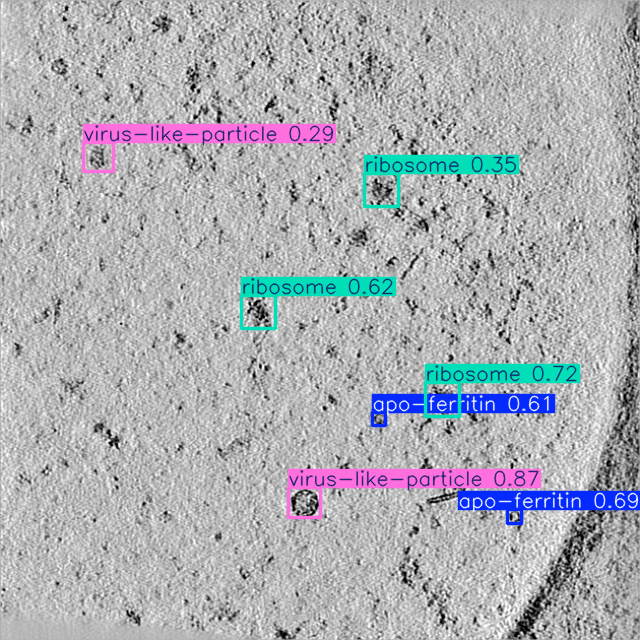

In [ ]:
results = model("/kaggle/input/czii-yolo-datasets-kim/datasets/czii_det2d/images/val/TS_5_4_1200.png") #이미지를 모델에 넣어 추론을 수행
#/kaggle/input/czii-yolo-datasets/datasets/czii_det2d/images/val/TS_5_4_920.png
results[0].show()

In [ ]:
import shutil

shutil.make_archive("/kaggle/working/runs", 'gztar', "/kaggle/working/runs")

'/kaggle/working/runs.tar.gz'

# Continue to [Submission Baseline...](https://www.kaggle.com/code/itsuki9180/czii-yolo11-submission-baseline)